<center>

<h1> Generate and Test </h1>
</center>

## Take from a list

`take(HasX,X,NoX)` removes exactly one element `X` from the list `HasX` with the result list being `NoX`. 

In [ ]:
take([X|T],X,T).
take([H|T],X,[H|S]) :- take(T,X,S).

Read the second clause as, "Given a list `[H|T]` you can take `X` from the list and leave `[H|S]` if you can take `X` from `T` and leave `S`".

## Take from a list

In [ ]:
?- take([1,2,3],1,Y).

In [ ]:
?- take([2,3],1,X).

In [ ]:
?- take([1,2,3,1],X,Y).

## Permutation

We can now build permutation using take.

In [ ]:
perm([],[]).
perm(L,[H|T]) :- take(L,H,R), perm(R,T).

In [ ]:
?- perm([1,2,3],X).

## Generate and test

* A design pattern for logic programming.
* Generate a candidate solution and then test if the solution satisfies the condition.

## Dutch national flag

<center>
    
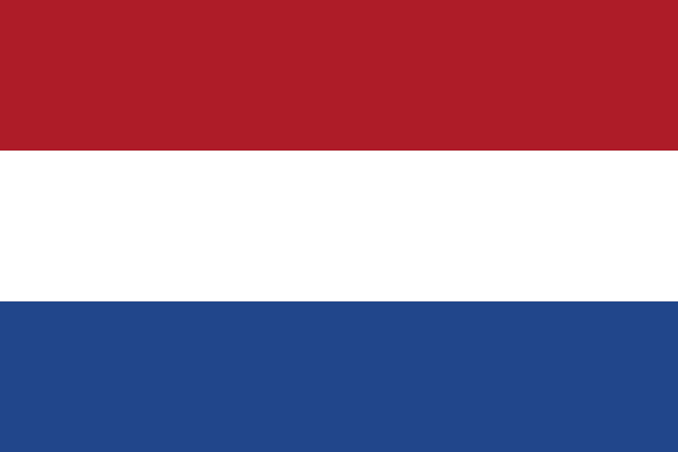
</center>

* A famous problem formulated by Edsger Dijkstra.
* Given a list with colours red, white and blue, return a list such that it has all the reds, and then white followed by blue.
  + Essentially a sorting problem.

## Dutch national flag

Implement a predicate `checkFlag(L)` to see whether the list `L` contains the colours in the right order.

In [ ]:
checkRed([red|T]) :- checkRed(T).
checkRed([white|T]) :- checkWhite(T).
checkWhite([white|T]) :- checkWhite(T).
checkWhite([blue|T]) :- checkBlue(T).
checkBlue([blue|T]) :- checkBlue(T).
checkBlue([]).
checkFlag(L) :- checkRed(L).

In [ ]:
?- checkFlag([red,white,blue,blue]).

In [ ]:
?- checkFlag([white,red,blue,blue]).

## Quiz
```
checkRed([red|T]) :- checkRed(T).
checkRed([white|T]) :- checkWhite(T).
checkWhite([white|T]) :- checkWhite(T).
checkWhite([blue|T]) :- checkBlue(T).
checkBlue([blue|T]) :- checkBlue(T).
checkBlue([]).
checkFlag(L) :- checkRed(L).
```
What is the result of 

1. `?- checkFlag([white,blue]).`
2. `?- checkFlag([blue]).`
3. `?- checkFlag([]).`

## Quiz
```
checkRed([red|T]) :- checkRed(T).
checkRed([white|T]) :- checkWhite(T).
checkWhite([white|T]) :- checkWhite(T).
checkWhite([blue|T]) :- checkBlue(T).
checkBlue([blue|T]) :- checkBlue(T).
checkBlue([]).
checkFlag(L) :- checkRed(L).
```
What is the result of 

1. `?- checkFlag([white,blue]).` **true**
2. `?- checkFlag([blue]).` **false**
3. `?- checkFlag([]).` **false**

How can we prevent the first predicate from holding?

## Better flag check

Introduce a new state `chkRed2` in the transition system.

In [ ]:
chkRed([red|T]) :- chkRed2(T).
chkRed2([red|T]) :- chkRed2(T).
chkRed2([white|T]) :- chkWhite(T).
chkWhite([white|T]) :- chkWhite(T).
chkWhite([blue|T]) :- chkBlue(T).
chkBlue([blue|T]) :- chkBlue(T).
chkBlue([]).
chkFlag(L) :- chkRed(L).

In [ ]:
?- chkFlag([white,blue]).

## Make the dutch national flag

Using the predicate `mkFlag(L,F)` which makes the flag `F` from the list of colours in `L`. 

In [ ]:
mkFlag(L,F) :- perm(L,F), chkFlag(F).

In [ ]:
?- mkFlag([white,red,blue,blue,blue],F) {1}.

In the above, `perm` is the generate and `chkFlag` is the test.

## Essence of generate and test

1. Generate a solution.
2. Test if it is valid.
3. If not valid, backtrack and try another solution.

## Sorting

We can generalise our solution to the Dutch national flag problem to sorting. 

Let us define a predicate `sorted(L)` which holds if `L` is sorted.

In [ ]:
sorted([]).
sorted([H]).
sorted([A,B|T]) :- A =< B, sorted([B|T]).

## Sorting

In [ ]:
?- sorted([1,2,3,4]).

In [ ]:
?- sorted([1,3,2,4]).

## Sorting

Now sorting can be defined using the predicate `permsort(L,SL)`, where `SL` is the sorted version of `L`.

In [ ]:
permsort(L,SL) :- perm(L,SL), sorted(SL).

In [ ]:
?- permsort([1,3,5,2,4,6], SL).

## Sorting

* Generating all the permutations and checking for sortedness is a terrible idea.
* A better approach is to divide and conquer.

## Quicksort

* A bit of a digression from generate and test.
* Use divide and conquer to sort the results.
* First, define the predicate `partition(L,X,LES,GS)` that given a list `L` and an element `X` partitions the list into two. 
  + The first is `LES` which contains elements from `L` less than or equal to `X` and 
  + `GS` which contains elements from `L` greater than `X`.

## Quicksort

Let's first define a partition predicate `partition(Xs,X,Ls,Rs)` that partitions elements in `Xs` into `Ls` and `Rs` where $\forall E \in Ls. E =< X$ and $\forall E \in Rs. E > X$.

In [ ]:
partition([],Y,[],[]).
partition([X|Xs],Y,[X|Ls],Rs) :- X =< Y, partition(Xs,Y,Ls,Rs).
partition([X|Xs],Y,Ls,[X|Rs]) :- X > Y, partition(Xs,Y,Ls,Rs).

In [ ]:
?- partition([6,5,3,2,1,0],4,X,Y).

## Quicksort

Quicksort works by partitioning the list into two, sorting each one, and appending to get the resultant sorted list.

In [ ]:
quicksort([H|T],SL) :-
  partition(T,H,Ls,Rs),
  quicksort(Ls,SLs),
  quicksort(Rs,SRs),
  append(SLs,[H|SRs],SL).
quicksort([],[]).

In [ ]:
?- quicksort([6,5,4,3,2,1,0],SL).

## N-Queens problem

Find the assignment of N-queens on a NxN chessboard such that none of the queens threaten each other. 

<center>
    
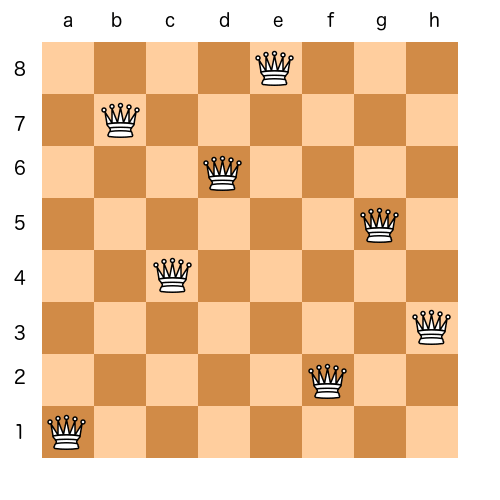
</center>

## N-Queens Problem

* If two queens are on the same row or same column, they threaten each other. 
  + So design the data structure such that such cases are ruled out **by construction**.
  + Make invalid states unrepresentable.

## N-Queens Problem

* Represent the positions of the queens as a permutation of `[1,2,3,...,N]`.
  + Each number represents the position of the queen in that row.
  + `[1,2,3,...]` says that the first queen is on (1,1), second on (2,2), ...
  + The soution, if it exists, is a permutation of this. 
* Importantly, two queens cannot be on the same row or column.
  + No need to check for this condition while checking validity.
  + Such permutations aren't even generated, making the search fast. 

## N-Queens problem
<center>
    
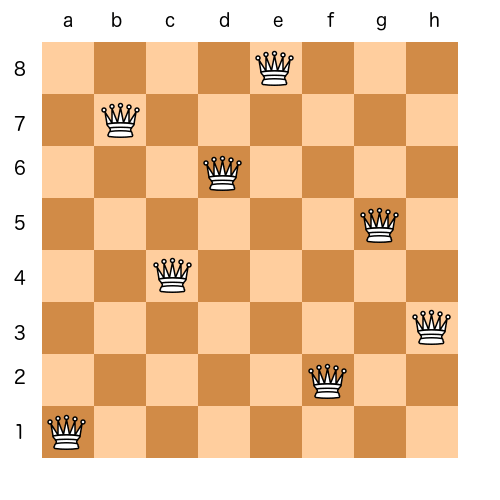
</center>

In [ ]:
checkBoard([H|T]) :- L is H-1, R is H+1, checkQueen(T,L,R), checkBoard(T).
checkQueen([H|T],L,R) :- H =\= L, H =\= R, LN is L-1, RN is R+1, checkQueen(T,LN,RN).
checkBoard([]).
checkQueen([],_,_).

In [ ]:
?- checkBoard([1,6,8,3,7,4,2,5]).

## N-Queens Problem

Use `mkList(N,I)` to generate the initial board assignment.

In [ ]:
mkList(0,[]).
mkList(N,L) :- N > 0, M is N-1, mkList(M,P), append(P,[N],L).

In [ ]:
?- mkList(8,X).

In [ ]:
nqueens(N,B) :- mkList(N,I), perm(I,B), checkBoard(B).

## N-queens Problem

In [ ]:
?- nqueens(8,B) {1}.

There are [92 solutions](https://en.wikipedia.org/wiki/Eight_queens_puzzle) to 8-Queens problem. We can find them all. 

In [ ]:
?- nqueens(8,B) {92}.